# Projetos de ciência de dados com Python

## Capítulo 3 - Detalhes da regressão logística e exploração de características

### Exercícios

- Exercício 11: Teste F e seleção de características univariadas

- Exercício 12: Visualizando o relacionamento entre as características e a resposta

- Exercício 13: Plotando a função sigmóide

- Exercício 14: Examinando a conveniência das características para a regressão logísticas

- Exercício 15: Limite de decisão linear da regressão logística

- Atividade 3: Ajustando um modelo de regressão logística e usando os coeficientes diretamente

---

### Etapa preliminar

In [9]:
import numpy as np #cálculo númerico
import pandas as pd # preparação dos dados
import matplotlib.pyplot as plt #pacote de plotagem
import seaborn as sns #pacote de plotagem

df = pd.read_csv('chapter_1_cleaned_data.csv')

Agora faremos uma lista de todas as colunas do DataFrame e examinaremos as primeiras e as últimas cinco:

In [10]:
features_response = df.columns.to_list()
print(features_response[:5])
print(features_response[-5:])

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']
['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']


Criaremos outra lista de nomes de colunas que não sejam características ou resposta. Queremos excluir esses itens de nossa análise:

In [11]:
itens_to_remove = ['ID', 'SEX', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

> O livro contem detalhes da exclusão de cada característica, a ideia do resumo não é entrar nesses detalhes.

Para termos uma lista de nomes de colunas composta somente das características e da resposta que usaremos, removeremos os nomes contidos em *items_to_remove* da lista atual existente em *features_response*.

A seguir temos um exemplo de ***list comprehension*** e como podemos usa-la para nosso interesse:

In [13]:
features_response = [item for item in features_response if item not in itens_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Exercício 11: Teste F e seleção de características univariadas

Neste exercício, usaremos o teste F para examinar a relação entre as características e a resposta. Investifaremos esse método como parte do que é chamado de **seleção de características univariada**: a prática de testar as características uma a uma em relação à variável de resposta para ver quais têm poder preditivo. Execute as etapas a seguir para fazer o exercício:

##### 1. A primeira etapa para a execução do teste F ANOVA é separar as características e a resposta como arrays *NumPy* usando uma lista que criamos e a indexação de inteiros do pandas:

In [15]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


Há 17 características, e os arrays tanto de características quanto da resposta têm o mesmo número de amostras como esperado.

##### 2. Importe a função *f_classif* e forneça as características e a resposta:

In [16]:
from sklearn.feature_selection import f_classif

[f_stat, f_p_value] = f_classif(X, y)

Duas saídas são obtidas de *f_classif*: a **estatística F** e o **valor-p**. para a comparação de cada característica com a variável de resposta. Criaremos um novo DataFrame contendo os nomes das características e essas saídas para facilitar nossa inspeção. Uma maneira de especificar um novo DataFrame é usando um **dicionário**, com pares **chave:valor** de nomes de colunas e dos dados que ficarão contidos em cada uma delas. Mostraremos o DataFrame classificado (de forma ascendente) pelo valor-p.

##### 3. Use este código para criar um DataFrame com nomes de características, com a estatística F e com os valores-p e exiba-o classificado pelo valor-p:

In [17]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


Observe que, para cada diminuição no valor-p, há um aumento na estatística F, logo, as informações dessas colunas são basicamente as mesmas em termos de classificação de características.

As conclusões a que podemos chegar pelo DataFrame da estatística F e dos valores-p são semelhantes ao que observamos na plotagem de correlação: `PAY_1` e `LIMIT_BAL` parecem ser as características mais úteis. Elas têm valores-p menores, o que indica que os valores da média dessas características entre a positiva e negativa são **significativamente diferentes**, e ajudarão a prever a que classe uma amostra pertence.

No scikit-learn, um dos usos para avaliações como o teste F é na execução da **seleção de características univariada**. Isso pode ser benéfico se você tiver um número muito grande de características, várias talvez totalmente inúteis, e quiser uma maneira rápida de obter uma "lista curta" com as mais úteis. Por exemplo, se quiséssemos recuperar apenas 20% das características com maior estatística F, poderíamos fazer isso facilmente com a classe *SelectPercentile*. É bom ressaltar também que há uma classe semelhante para a seleção das "k" principais características ( em que k é qualquer número que especificarmos), chamada *SelectKBest*. Aqui demonstraremos como selecionar as 20% melhores.

##### 4. Para selecionar as características consideras pelo teste F como as 20% melhores, primeiro importe a classe *SelectPercentile*:

In [18]:
from sklearn.feature_selection import SelectPercentile

##### 5. Instancie um objeto dessa classe, indicando que queremos usar o mesmo critério de seleção de características, o teste F ANOVA, que consideramos até agora neste exercício, e que, entre as características, queremos as 20% melhores.

In [19]:
selector = SelectPercentile(f_classif, percentile=20)

##### 6. Use o método *.fit* para ajustar o objeto às características e aos dados da resposta, semelhante a como um modelo seria ajustado:

In [20]:
selector.fit(X, y)

SelectPercentile(percentile=20)

Há várias maneiras de acessar as caracterpisticas selecionadas diretamente, o que você pode aprender na documentação do *scikit-learn* (examinando o método *.transform*, ou o emprego de *.fit_transform* na etapa do ajuste). No entanto, esses métodos retornarão arrays *NumPy*, que não informam os nomes das características que foram selecionadas, somente os valores. Para resolver isso, você pode usar o método *.get_support* do objeto seletor de características, que lhe informará os índices de colunas selecionados no array de características.

##### 7. Capture os índices das características selecionadas em um array chamado *best_feature_ix*:

In [21]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

A saída indica um índice lógico que pode ser usado com um array de nomes de características, assim como valores, supondo que estejam na mesma ordem do array de características fornecido para *SelectPercentile*:

##### 8. Os nomes das características podem ser obtidos com o uso de todos os elementos exceto o último (nome da variável de resposta) de nossa lista *features_response* pela indexação com :-1:

In [24]:
features = features_response[:-1]

##### 9. Use o array de índices que criamos na ***Etapa 7*** com uma *list comprehension* e a lista *features* para encontrar os nomes das caracteristicas selecionadas, como descrito a seguir:

In [25]:
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

Nesse código, a *list comprehension* percorreu os elementos do array *features(len(features))* com o incremento de loop counter, usando o array booleano *best_feature_ix*, que representa as características selecionadas, na instrução *if* para verificar cada característica e capturar o nome das escolhidas.

As características selecionadas equivalem às quatro primeiras linhas do DataFrame de resultados do teste F, logo, a seleção funcionou como esperado. Embora não seja necessário agir das duas maneiras, já que ambas levam o mesmo resultado, é bom fazê-lo para avaliar o trabalho, considerando-se que você esta aprendendo novos conceitos. É precisa estar alerta para o fato de que, com métodos de conveniência como *SelectPercentile*, você não visualizará a estatística F ou os valores P. No entanto, em algumas situações pode ser melhor usá-los porque os valores-p podem não ser importantes a não ser na classificação de características.

---

### Exercício 12: Visualizando o relacionamento entre as características e a resposta

Neste exercício, você aumentará seu conhecimento sobre as funções de plotagem do matplotlib que usamos no livro. Aprenderemos como personalizar os gráficos para responder melhor a perguntas específicas usando os dados. Ao fazer essas análises, criaremos visualizações significativas de como as características `PAY_1` e `LIMIT_BAL` estão relacionadas com a variável de resposta, o que pode dar suporte às hipóteses que formulamos sobre elas. Isso será feito pela aquisição de um conhecimento maior da **API** ***Matplotlib***. Execute as etapas a seguir para fazer o exercício:

##### 1. Calcule a linha de base da variável de resposta para a taxa de inadimplência de todo o dataset usando o método *.mean()* do pandas:

In [26]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

**Qual seria uma boa maneira de visualizar as taxas de inadimplência para diferentes valores da característica `PAY_1`?**

Lembre-se de que verificamos que essa característica é híbrida, sendo tanto categórica quanto numérica. Vamos plotá-la de uma forma que é típica de características categóricas, devido ao número relativamente pequeno de valores exclusivos. No *Capítulo 1, Exploração e limpeza e dados* fizemos contagens de valores dessa característica como parte da exploração de dados e depois conhecemos *groupby/mean* quando examinamos a característica `EDUCATION`. *groupby/mean* seria uma boa maneira de visualizarmos a taxa de inadimplência para diferentes status de pagamento.

##### 2. Use este código para criar uma agregação *groupby/mean*:

In [27]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


Com a verificação desses valores já podemos discernir a tendência. Passaremos direto à sua plotagem. Vamos executá-la por etapas e introduziremos alguns conceitos novos. Você deve inserir todo o código das etapas 3 a 6 na mesma célula.

No *Matplotlib*, cada plotagem aparece em um objeto *axes* e dentro de uma janela *figure*. Criando objetos para *axes* e *figures*, você pode acessar e alterar diretamente suas propriedades, inclusive os rótulos dos eixos, as *tick marks*, e outros elementos dos eixos, ou as dimensões da figura.

##### Etapas 3 a 7

- 3. Crie um objeto *axes* em uma variável também chamada *axes* usando o código a seguir
- 4. Plote a taxa de inadimplência geral como uma linha horizontal vermelha.

O *Matplotlib* facilita essa operação; você só precisa indicar a interceptação de y na linha com a função *axhline*. Observe que, em vez de chamar a função a partir de *plt*, estamos chamando-a como um método em nosso objeto *axes*:

Agora, sobre essa linha, queremos plotar a taxa de inadimplência dentro de cada grupo de valores de `PAY_1`.

- 5. Use o método *plot* do DataFrame de dados agrupados que criamos. Especifique um marcador 'x' ao longo da plotagem da linha e a inexistência de uma instância de *legend*, que criaremos posteriormente; informe que o **eixo pai** da plotagem deve ser o objeto *axes* com o qual estamos trabalhando (caso contrário, o pandas removerá o objeto existente e criará um novo objeto *axes*):

- 6. Defina o rótulo do eixo y e crie uma instância de *legend* (há muitas opções para controlarmos a aparência da legenda, mas uma maneira simples é fornecer uma lista de strings indicando os rótulos dos elementos gráficos na ordem em que foram adicionados a *axes*)

- 7. A execução de todo o código das *Etapas 3* a *6* em uma única célula deve resultar na plotagem a seguir:

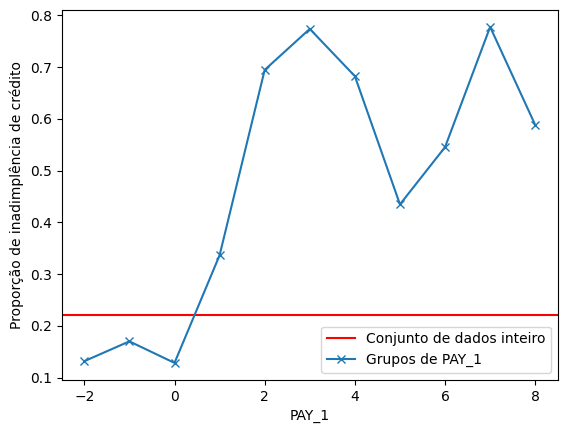

In [28]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proporção de inadimplência de crédito')
axes.legend(['Conjunto de dados inteiro', 'Grupos de PAY_1'])

Nossa visualização dos status de pagamento revelou uma história clara e provavelmente esperada: quem já inadimpliu apresenta uma tendência maior de fazê-lo novamente. A taxa de inadimplência de contas em boa situação está bem abaixo da taxa geral, que sabemos que era de aproximadamente 22%. No entanto, pelo menos 30% das contas que estavam inadimplentes no último mês estarão inadimplentes novamente no próximo mês de acordo com a verificação. Essa é uma boa referência visual para compartilharmos com o sócio da empresa já que mostra o efeito da característica que talvez seja a mais importante de nosso modelo.

Agora voltaremos nossa atenção para a característica classificada como tendo a segunda associação mais forte com a variável alvo: `LIMIT_BAL`. Trata-se de uma característica numérica com muitos valores exclusivos. Uma boa maneira de visualizar características como essa, para um problema de classificação, é plotar vários histogramas no mesmo eixo, com diferentes cores para classes distintas. Como maneira de separar as classes, podemos indexá-las a partir do DataFrame usando arrays lógicos.

##### 8. Use este código para criar máscaras lógicas para amostras positivas e negativas:

In [29]:
pos_mask = y == 1
neg_mask = y == 0

Para criar nossa plotagem de histograma dupla, geraremos outro objeto *axes* e chamaremos o método *.hist* nele duas vezes para os histogramas das classes positiva e negativa. Forneceremos alguns argumentos de palavra-chave adicionais: *alpha* cria transparência nos histogramas, para que, se eles se sobrepuserem, ainda possamos vê-los, e especificaremos as cores. As cores azul e vermelha, com transparência, exibirâo uma cor roxa em locais em que os histogramas se sobrepuserem. Uma vez que tivermos os histogramas, giraremos os *tick label* do eixo x para torná-los mais legíveis e criaremos outras anotações que devem ser autoexplicativas.

##### 9. Use o código a seguir para criar a plotagem de histograma dupla comas propriedades já mencionadas:

Text(0.5, 1.0, 'Limite de crédito pela variável resposta')

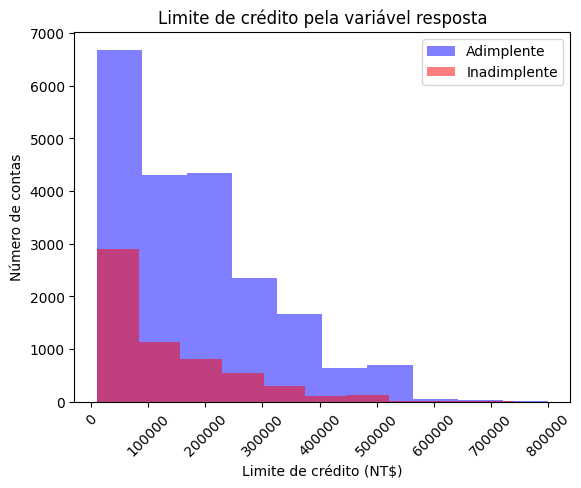

In [33]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Limite de crédito (NT$)')
axes.set_ylabel('Número de contas')
axes.legend(['Adimplente', 'Inadimplente'])
axes.set_title('Limite de crédito pela variável resposta')

Embora essa plotagem tenha ficado com a formatação desejada, ela não é tão explicativa como poderia. Queríamos olhar para ela e constatar que o limite de crédito pode ser uma boa maneira de diferenciar as contas inadimplentes das que não inadimplirão. No entanto, nossa principal percepção visual é a de que o histograma azul é maior que o vermelho. Isso ocorre porque há menos contas inadimplentes. Já sabíamos desse fato pela verificação das frações das classes.

Seria mais informativo exibir algo sobre como as formas desses histogramas são diferentes, e a não apenas seus tamanhos. Para enfatizar esse ponto, podemos tornar igual a área plotada total dos dois histogramas, **normalizando-os**. O *Matplotlib* fornece um argumento de palavra-chave que facilita a criação do que poderíamos considerar a versão empírica de uma **função de densidade de probabilidade**. Isso significa que a integral, ou a área contida dentro de cada histograma, será igual a 1 após a normalização, já que as probabilidades resultam em 1.

Após alguns testes, decidimos criar um histograma com 16 bins. Já que o limite máximo de crédito é NT$800,000, usamos *range* com um incremento de NT$50000.

##### 10. Crie as bordas dos bins do histograma com esse código, que também exibirá a borda de bin final como uma verificação:

In [31]:
bin_edges = list(range(0, 850000, 50000))
print(bin_edges[-1])

800000


O  código de plotagem dos histogramas normalizados é semelhante ao anterior, com algumas alterações importantes: o uso da palavra-chave *bins* para definir a localização das bordas dos bins, *density=True* para normalizar os histogramas, e alterações nas anotações da plotagem. A parte mais complexa é termos de ajustar os ***tick labels* de y** para que as alturas dos bins do histograma tenham a interpretação das proporções, que é mais intuitiva que a saída padrão.

Os *tick labels* de y são os rótulos de texto exibidos perto dos ticks do eixo y e costumam ser simplesmente os valores dos ticks nesses locais. No entanto, você pode alterar isso manualmente se quiser.

##### 11. Execute este código para produzir histogramas normalizados:

/tmp/ipykernel_88352/1249819369.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000, 2))


Text(0.5, 1.0, 'Distribuições normalizadas do limite de crédito pela variável responsavel')

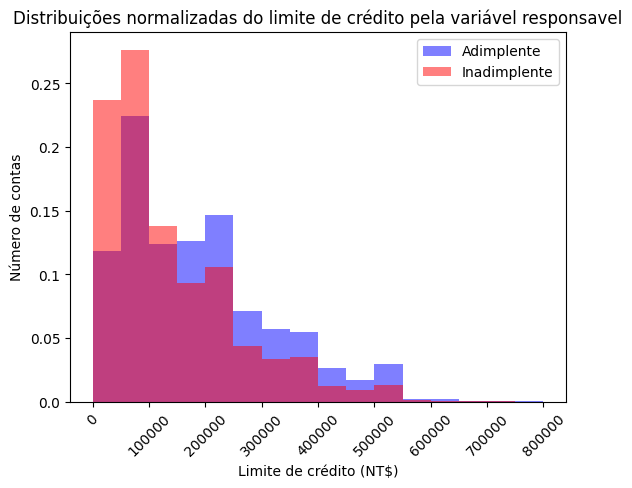

In [34]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins= bin_edges, alpha=0.5, density= True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins= bin_edges, alpha=0.5, density= True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Limite de crédito (NT$)')
axes.set_ylabel('Número de contas')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000, 2))
axes.legend(['Adimplente', 'Inadimplente'])
axes.set_title('Distribuições normalizadas do limite de crédito pela variável responsavel')

Podemos ver que as plotagens do *Matplotlib* são altamente personalizáveis. Para visualizar todos os diferentes itens que você pode obter (*get*) e definir (*set*) nos eixos do *Matplotlib*.

O que podemos extrair dessa pĺotagem? parece que as contas inadimplentes tendem a ter uma proporção maior de limites de crédito menores. Contas com limites de crédito menores do que NT$150,000 estão relativamente mais propensas a inadimplir, enquanto o oposto é verdadeiro para contas com limites maiores do que esse. Devemos considerar se isso faz sentido. Nossa hipótese era de que o cliente daria limites menores a contas que apresentassem mais risco. Essa intuição é compatícel com as proporções maiores de inadimplentes com limites de crédito menores que observamos aqui.

Dependendo de como ocorrer a construção do modelo, se as características examinadas neste exercício se mostrarem importantes para a modelagem preditiva como esperado, seria bom exibir esses gráficos para nosso cliente como parte de uma apresentação do trabalho. Isso daria ao cliente uma ideia de como o modelo funciona.

Algo essencial que aprendemos nesta seção é que leva tempo produzir apresentações visuais eficazes. É bom reservar algum tempo no fluxo de trabalho de seu projeto para isso. Apresentações visuais convincentes valem o esforço, já que comunicam descobertas importantes de maneira rápida e eficiente para o cliente. Geralmente elas são uma opção melhor do que adicionar muito texto aos materiais criados. A comunicação visual de conceitos quantitativos é uma habilidade-chave da ciência de dados.

---

### Exercício 13: Plotando a função sigmóide

Neste exercíccio, usaremos as variáveis *X_exp* e *Y_exp*, criadas anteriormente, para gerar uma plotagem da função exponencial no intervalo [-4,4]. Você precisará de todo o código das *figuras 3.23* e *3.24* (livro) para ter essas variáveis disponíveis no exercício. Em seguida, definiremos uma função para o sigmóide, criaremos uma plotagem dela e consideraremos qual sua relação com a função exponencial. Execute as etapas a seguir para fazer o exercício:

*Figura 3.23 - Exp(1) e exp(0) com o NumPy*

In [42]:
print('e')
print(np.exp(1))
print('-'*20)
print('e⁰')
print(np.exp(0))

e
2.718281828459045
--------------------
e⁰
1.0


*Figura 3.24 - Usando np.linspace para criar um array*

In [46]:
X_exp = np.linspace(-4,4,81)
Y_exp = np.exp(X_exp)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


##### 1. Use este código para plotar a função exponencial

Text(0.5, 1.0, 'Plot de $e^X$')

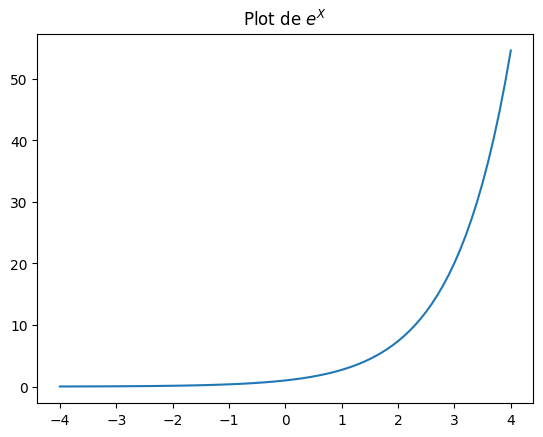

In [47]:
plt.plot(X_exp, Y_exp)
plt.title('Plot de $e^X$')

Observe que, ao nomear a plotagem, nos beneficiamos de um tipo de sintaxe chamado ***LaTeX***, que permite formatar notação matemática. Não entraremos em detalhes sobre o LaTeX aqui, é suficiente dizer que ele é muito flexível. Repare que inserir parte da string do título entre cifrões faz com que ela seja renderizada com o uso do LaTeX, e que o sobrescrito pode ser criado com o uso de ^.

Observe também na figura que muitos pontos com pouco espaço entre eles geram uma curva de aparência suave, mas na verdade é um gráfico de pontos distintos conectados por segmento de linha.

**O que podemos aprender com a função exponencial?**

Ela nunca é negativa: à medida que *X* se aproxima do infinito negativo, *Y* se aproxima de 0.

À medida que *X* aumenta, no início de *Y* aumenta lentamente, mas com muita rapidez "explode". É a isso que as pessoas se referem quando usam a expressão "crescimento exponencial" para indicar um aumento rápido.

**O que podemos dizer da função sigmóide em relação à função exponencial?**

A função sigmóide envolve $e^{-x}$ e não $e^x$ O gráfico de $e^{-x}$ é apenas o reflexo de $e^x$ sobre o *eixo y*. Ele pode ser plotado facilmente, com o uso de chaves para gerarmos caracteres em sobrescrito no título da plotagem.

##### 2. Execute este código para ver a plotagem de $e^{-x}$.

Text(0.5, 1.0, 'Plot de $e^{-x}$')

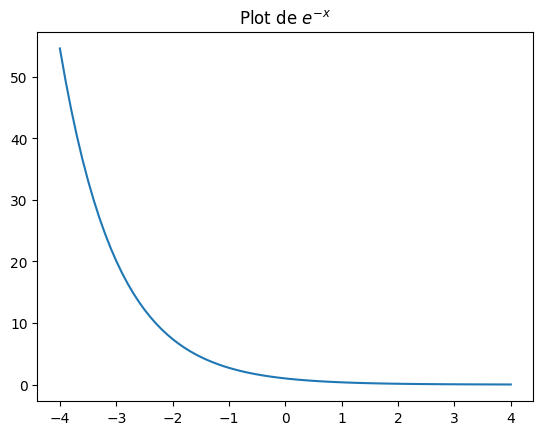

In [49]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot de $e^{-x}$')

Na função sigmóide, $e^{-x}$ fica no denominador, com 1 sendo adicionado. O numerador é 1. Então, o que ocorre na função à medida que *X* se aproxima do infinito negativo? Sabemos que $e^{-x}$ "aumenta explosivamente", tornando-se muito alto. O denominador torna-se muito alto e a fração aproxima-se de 0. E no caso em que *X* aumenta em direção ao infinito positivo? Podemos ver que $e^{-x}$ chega muito perto de 0. Portanto, nesse caso, a função sigmóide seria aproximadamente *1/1 = 1*. Isso nos dá a impressão de que a função fica entre 0 e 1. Implementamos uma função sigmóide em Python e a usaremos para criar uma plotagem e ver se a realidade coincide com essa impressão.

##### 3. Defina uma função sigmóide como esta:

In [50]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

##### 4. Crie um intervalo maior de valores de x para usar na plotagem e represente a função sigmóide. Use este código:

Text(0.5, 1.0, 'A função sigmóide')

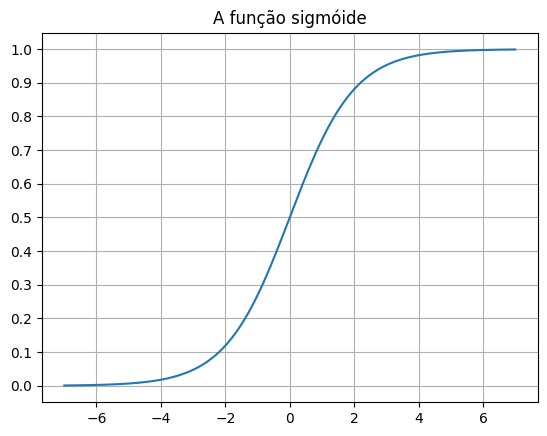

In [51]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('A função sigmóide')

Essa imagem coincide com o que esperávamos. Além disso, podemos ver que *sigmoid(0)* = 0.5. O que a função sigmóide tem de especial? A saída dessa função fica estritamente entre 0 e 1. Essa é uma boa propriedade para uma função que deve prever probabilidades, que também precisam estar entre 0 e 1. Tecnicamente as probabilidades podem ser exatamentes iguais a 0 e 1, embora a função sigmóide nunca seja. No entanto, ela chega perto demais para que essa seja uma limitação prática.

Você deve lembrar-se de que descrevemos a regressão logística como produzindo **probabilidades previstas** de associação de classe em vez de prever diretamente a associação. Isso permite uma implementação mais flexível da regressão logística, possibilitando a seleção da probabilidade limite. A função sigmóide é a fonte dessas probabilidades previstas. Em breve veremos como as diferentes características são usadas no cálculo das probabilidades previstas.

---

### Exercício 14: Examinando a conveniência das características para a regressão logística

No *Exercício 12: Visualizando o relacionamento entre característica e a resposta*, plotamos uma operação *groupby/mean* para a característica que talvez seja a mais importante do modelo, de acordo com nossa exploração até agora: `PAY_1`. Ao agrupar amostras pelos valores de `PAY_1` e verificar a média da variável de resposta, na verdade estamos examinando a probabilidade *p* de inadimplência dentro de cada um desses grupos.

Neste exercício, avaliaremos a conveniência do uso de `PAY_1` na regressão logística. Faremos isso examinando o logaritmo das chances de inadimplência dentro desses grupos para ver se a variável de resposta é linear, como supõe formalmente a regressão logística. Execute as etapas a seguir para fazer o exercício:

##### 1. Veja se ainda consegue acessar as variáveis do *Exercício 12, Visualizando o relacionamento entre as características e a resposta* no notebook examinando o código a seguir o DataFrame do valor de média da variável de resposta para diferentes valores de `PAY_1`:

In [52]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


##### 2. Extraia os valores de média da variável de resposta para esses grupos e insira-os em uma variável, *p*, representando a probabilidade de inadimplência:

In [53]:
p = group_by_pay_mean_y['default payment next month'].values

##### 3. Crie uma probabilidade, *q*, de inexistência de inadimplência. Já que há apenas dois resultados possíveis nesse problema binário, e a soma das probabilidades é 1, é muito fácil calcular *q*. Exiba também os valores de *p* e *q* para confirmar:

In [56]:
q = 1-p
print(f'p = {p}')
print(f'q = {q}')

p = [0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
q = [0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


##### 4. Calcule a razão de possibilidades de *p* e *q*, assim como o logaritmo das chances, usando a função de logaritmo natural do NumPy:

In [57]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

##### Para plotar o logaritmo das chances para os valores da característica, podemos obter os valores no índice do DataFrame que contém *groupby/mean*. Você pode exibir o índice desta forma:

In [58]:
group_by_pay_mean_y.index

Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

##### 6. Crie uma plotagem semelhante à que criamos anteriormente, para exibir o logaritmo das chances dos valores da característica. Aqui está o código:

Text(0.5, 0, 'Valores de PAY_1')

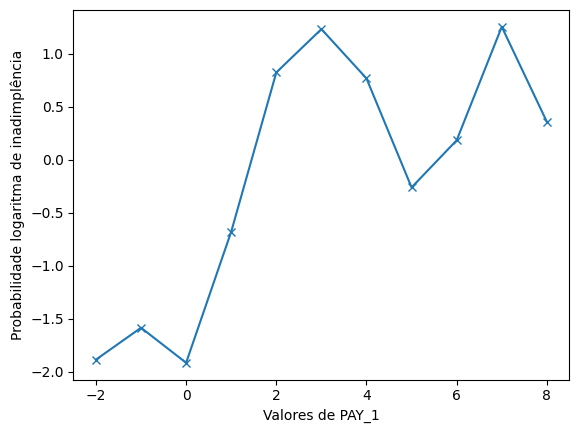

In [60]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
plt.ylabel('Probabilidade logaritma de inadimplência')
plt.xlabel('Valores de PAY_1')

Podemos ver nessa plotagem que o relacionamento entre o logaritmo das chances da variável de resposta e a característica `PAY_1` não é tão diferente do relacionamento entre a taxa de inadimplência e essa característica, que plotamos no *Exercício 12, Visualizando o relacionamento entre as características e a resposta*. Logo, se a "taxa de inadimplência" for um conceito mais simples para você comunicar para o socio da empresa, pode ser melhor usá-lo. No entanto, em termos de entendimento do funcionamento da regressão logística, essa plotagem mostra exatamente o que se supões que seja linear.

---

### Exercício 15: Limite de decisão linear da regressão logística

Neste exercpicio, ilustraremos o conceito de **limite de decisão** para uma classificação binária. Usaremos dados sintéticos para criar um exemplo claro de visualização do limite de decisão da regressão logística em relação às amostras de treinamento. Começaremos gerando aleatoriamente duas características, $X_1$ e $X_2$. Já que há duas características, podemos dizer que os dados desse problema são bidimensionais. Isso facilita a visualização. Os conceitos que ilustraremos aqui podem ser generalizados para casos de mais de duas características, como os datasets do mundo real que provavelmente você verá em seu trabalho; no entanto, o limite de decisão é mais difícil de visualizar em espaços com mais dimensões.

Execute as etapas a seguir para fazer o exercício:

##### 1. Gere as características usando o código a seguir:

In [61]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(1, 7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(3, 10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(1, 7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = np.random.uniform(3, 10, size=(20,1))
print(X_2_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[5.4790643 ]
 [5.3444234 ]
 [3.43664678]]
[[9.19684856]
 [9.83587114]
 [8.85836015]]


Não é preciso se preocupar com por que selecionamos esses valores; a plotagem criada posteriormente deixará isso bem claro. Observe, no entanto, que ao mesmo tempo também atribuiremos a classe real. Como resultado, teremos 20 amostras tanto na classe positiva quanto na negativa, pergazendo um total de 40 amostras e teremos duas características para cada amostra. Exibiremos os três primeiros valores de cada característica tanto para a classe positiva quanto para a negativa.

##### 2. Plote esses dados, colorindo as amostras positivas com vermelho e as negativas com azul. O código da plotagem é:

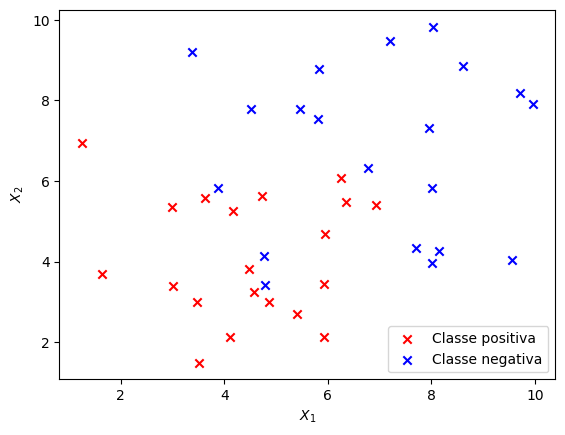

In [62]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Classe positiva', 'Classe negativa'])

Para usar nossas características sintéticas com o *scikit-learn*, temos de reuni-las em uma matriz. Usaremos a função *block* do NumPy para fazer isso e criar uma matriz de 40 por 2. Haverá 40 linhas porque há um total de 40 amostras e teremos 2 colunas porque há 2 características. Organizaremos as coisas de modo que as características das amostras positivas estejam nas 20 primeiras linhas e as das amostras negativas venham depois.

##### 3. Crie uma matriz 40 por 2 e exiba a dimensão e as 3 primeiras linhas:

In [63]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


Também precisamos de uma variável de resposta para acompanhar as características. Sabemos como defini-las, mas precisamos de um array de valores y para informar ao *scikit-learn*.

##### 4. Crie uma pilha vertical (*vstack*) de 20 1's e 20 0's que corresponda à organização das características e redimensione-a para a maneira que o *scikit-learn* espera. Aqui está o código:

In [64]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


Estamos prontos para ajustar um modelo de regressão logística para esses dados com o *scikit-learn*. Usaremos todos os dados como dados de treinamento e examinaremos com que eficácia um modelo linear conseguirá ajustá-los. As próximas etapas dever ser familiares devido ao trabalho em capítulos anteriores sobre como instanciar uma classe de modelo e como ajustar o modelo.

In [65]:
from sklearn.linear_model import LogisticRegression

##### 6. Agora instancie, indicando o *solver liblinear*, e exiba o objeto de modelo usando este código:

In [66]:
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(solver='liblinear')

##### 7. Treine o modelo com os dados sintéticos:

In [67]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

**Como ficarão as previsões de nosso modelo ajustado?**

Primeiro temos de obter as previsões usando o método *.predict* do modelo treinado, com as mesmas amostras empregas no treinamento. Em seguida, para adicionar as previsões à plotagem usando o esquema de cores vermelha = classe positiva e azul = classe negativa, criaremos duas listas de índices para utlizar com os arrays, dependendo de se as previsões forem 1 ou 0. Veja se consegue entender a maneira como usamos uma list comprehension incluindo uma instrução *if* para fazê-lo.

##### 8. Use esse código para obter as previsões e separe-as em índices de previsões de classe positiva e negativa. Exiba os índives de previsões de classes positiva como uma verificação:

In [71]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

Pelos índices das previsões positivas já podemos dizer que algumas amostras dos dados de treinamento foram classificadas incorretamente: as amostras positivas são as 20 primeiras, mas aqui há índices fora desse intervalo. Você deve ter percebido que um limite de decisão linear não conseguiria classificar corretamente esses dados, conforme nossa discussão. Agora inseriremos as previsões na plotagem, na forma de círculos ao redor de cada ponto de dados e usando cores de acordo com a previsão. Você pode comparar a cor dos símbolos **X**, os rótulos reais dos dados, com a cor dos círculos (previsões), para ver que pontos foram classificados corretamente e incorretamente.

##### 9. Aqui está o código da plotagem:

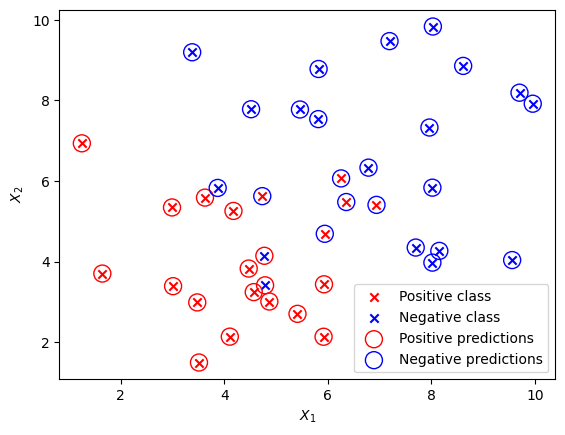

In [72]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o', edgecolors='red', facecolors= 'none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors= 'none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions', 'Negative predictions'])

Pela plotagem, fica claro que o classificador tem problemas com os pontos de dados que estão perto de onde seria o limite de decisão linear; alguns deles podem acabar no lado errado desse limite. Como poderíamos definir, e visualizar a localização real do limite de decisão? De acordo com a seção anterior, sabemos que podemos obter o limite de decisão de uma regressão logística, no espaço de características bidimensional, usando a desigualdade $X_2 \ge -(\theta_1/\theta_2)X_1 - (\theta_0/\theta_2)$. Já que ajustamos o modelo, podemos recuperar os coeficientes $\theta_1$ e $\theta_2$, assim como a interceptação $\theta_0$, para trazê-los para essa equação e criar a plotagem.

##### 10. Use este código para obter os coeficientes do modelo ajustado e exibi-los:

In [73]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.20245058016285838 -0.25336423626773225


##### 11. Use o código a seguir para obter a interceptação

In [74]:
theta_0 = example_lr.intercept_

Agora use os coeficientes e a interceptação para definir o limite de decisão linear. Isso capturará a linha divisória da desigualdade $X_2 \ge -(\theta_1/\theta_2)X_1 - (\theta_0/\theta_2)$:

In [76]:
X_1_decision_boundary = np.array([0, 10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)

Resumindo as últimas etapas, após usar os métodos *.coef_* e *.intercept_* para recuperar os coeficientes $\theta_1$, $\theta_2$ e a interceptação $\theta_0$ do modelo, fizemos uso deles para criar uma linha definida por dois-pontos, de acordo com a equação que descrevemos para o limite de decisão.

##### 12. Plote o limite de decisão usando o código a seguir, com alguns ajustes para atribuir os rótulos corretos para a legenda e movê-la para um local (*loc*) fora da plotagem se ela estiver ficando abarrotada:

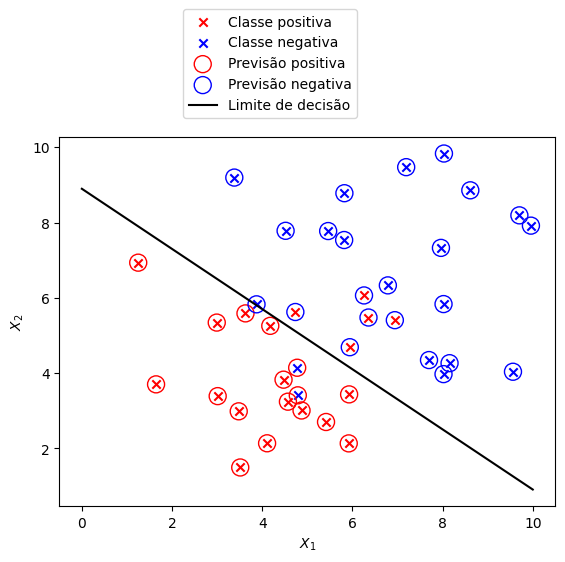

In [78]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='red', marker='x', label= 'Classe positiva')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x', label= 'Classe negativa')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='o', edgecolors='red', facecolors= 'none', label= 'Previsão positiva')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors= 'none', label= 'Previsão negativa')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-', label='Limite de decisão')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc= [0.25, 1.05])

**Qual é a diferença no limite de decisão em comparação com onde você achou que ele estaria?**

**Consegue perceber que um limite de decisão linear nunca classificaria com perfeição esses dados?**

Como uma maneira de resolver esse problema, poderíamos criar **características obtidas por engenharia** a partir de características existentes, como polinômios e interações, para permitir limites de decisão mais complexos e não lineares na regressão logística. Ou poderíamos usar modelos não lineares como a floresta aleatória, que também pode fazer isso, como veremos posteriormente.

Como observação final, esse exemplo foi visualizado facilmente em duas dimensões porque há apenas duas características. Em geral, o limite de decisão pode ser descrito por um **hiperplano**, que é a generalização de uma linha reta para espaços multidimensionais. No entanto, a natureza restritiva do limite de decisão linear também é um problema nos hiperplanos.

---

### Atividade 3: Ajustando um modelo de regressão logística e usando os coeficientes diretamente

Nesta atividade, treinaremos um modelo de regressão logística com as duas características mais importantes que descobrimos na exploração de características univariada e aprenderemos a imprementar a regressão logística manualmente usando coeficientes do modelo ajustado. Isso mostrará como podemos utilizar a regressão logística em um ambiente de computação em que o *scikit-learn* não esteja disponível, mas as funções matemáticas necessárias para o cálculo da função sigmóide estejam. Após a conclusão bem-sucedida da atividade, você notará que o valor ROC AUC calculado com previsões do *scikit-learn* e o obtido de previsões manuais são iguais: aproximadamente 0.63.

Execute as etapas a seguir para concluir a atividade:

##### 1. Crie uma divisão treinamento/teste (80/20) com `PAY_1` e `LIMIT_BAL` como características

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['PAY_1', 'LIMIT_BAL']].values, df['default payment next month'].values, test_size=0.2, random_state= 24)

##### 2. Importe *LogisticRegression* com as opções padrão, mas configure o solver com *'liblinear'*

In [80]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')

##### 3. Treine o modelo com os dados de treinamento e obtenha as classes previstas assim como as probabilidades das classes, usando os dados de teste.

In [81]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)

##### 4. Extraia os coeficientes e a interceptação do modelo treinado e calcule manualmente as probabilidades previstas. Você terá de adicionar uma coluna de 1's às suas características para multiplicar pela interceptação.

Primeiro, criaremos o array de característicaws, com uma coluna de 1's adicionada, usando o empilhamento horizontal:

In [82]:
ones_and_features = np.hstack([np.ones((X_test.shape[0],1)), X_test])

Agora precisamos da interceptação e dos coeficientes, que redimensionaremos e concatenaremos a partir da saída do *scikit-learn*:

In [83]:
intercept_and_coefs = np.concatenate([lr_model.intercept_.reshape(1,1), lr_model.coef_], axis=1)

Para multiplicar repetidamente a interceptação e os coeficientes por todas as linhas de *ones_and_features*, e calcular a soma de cada linha (isto é, encontrar a combinação linear), você poderia escrever tudo isso usando a multiplicação e a adição. No entanto, é muito mais rápido usar a função produto *dot*:

In [84]:
X_lin_comb = np.dot(intercept_and_coefs, np.transpose(ones_and_features))

Agora *X_lin_comb* tem o argumento que precisamos passar para a função sigmóide que definimos para calcular as probabilidades previstas:

In [85]:
y_pred_proba_manual = sigmoid(X_lin_comb)

##### 5. Usando um limite de 0.5, calcule manualmente as classes previstas. Compare o resultado com a saída de previsões de classes do *scikit-learn*.

As probabilidades previstas manualmente, *y_pred_prob_manual*, devem ser as mesmas de *y_pred_proba*; verificaremos isso em breve. Primeiro, preveja manualmente as classes com o limite:

In [86]:
y_pred_manual = y_pred_proba_manual >= 0.5

Esse array terá uma dimensão diferente de *y_pred*, mas deve conter os mesmos valores. Podemos verificar se todos os elementos dos dois arrays são iguais desta forma:

In [87]:
np.array_equal(y_pred.reshape(1,-1), y_pred_manual)

True

##### 6. Calcule o ROC AUC usando as probabilidades previstas pelo *scikit-learn* e as que você calculou manualmente e compare.

Primeiro, importe o seguinte:

In [88]:
from sklearn.metrics import roc_auc_score

Em seguida, calcule essa métrica nas duas versões, tomando o cuidado de acessar a coluna correta, ou redimensione quando necessário:

In [90]:
roc_auc_score(y_test, y_pred_proba_manual.reshape(y_pred_proba_manual.shape[1],))

0.627207450280691

In [91]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.627207450280691

As AUCs são iguais, O que fizemos aqui? Confirmamos que tudo de que precisamos nesse modelo ajustado do *scikit-learn* são três números: a interceptação e os dois coeficientes. Uma vez que os tivermos, poderemos criar previsões do modelos usando algumas linhas de código, com funções matemáticas, que sejam equivalentes às previsões feitas diretamente a partir do *scikit-learn*.

Isso é bom para confirmar o que sabemos, mas, caso contrário, por que o faríamos? Falaremos sobre a **implantação do modelo** no último capítulo. No entanto, dependendo das circunstâncias, você pode se ver em uma situação em que não tenha acesso ao Python em um ambiente em que novas características tenham de ser fornecidas ao modelo para previsão. Por exemplo, você pode ter de fazer previsões totalmente em SQL. Embora isso seja uma limiteação, com a regressão logística você pode usar as funções matemáticas que estão disponíveis em SQL para recriar a previsão, tendo apenas de copiar e colar a interceptação e os coeficientes em algum local de seu código SQL. O produto *dot* pode não estar disponível, mas você pode usar a multiplicação e a adicção para atingir o mesmo objetivo.

E quanto aos resultados propriamente ditos? O que vimos aqui é que podemos melhorar um pouco o desempenho do modelo além do que já fizemos: usando apenas `LIMIT_BAL` como característica na Atividade do capítulo anterior, a ROC AUC foi um pouco menor em 0.62, em vez de 0.63 como no caso atual. No próximo capítulo, aprenderemos técnicas avançadas com a regressão logística que poderemos usar para aumentar o desempenho mais do que aumentamos aqui.